<a href="https://colab.research.google.com/github/MAchinetyro/FASHION.MNIST/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn


In [2]:
print("GPU is available : {}".format(torch.cuda.is_available()))

GPU is available : True


In [3]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'

In [4]:
transform=transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ),(0.5, ))])

In [5]:
trainset=torchvision.datasets.FashionMNIST(root='./data',
                                    train=True,
                                    download=True,
                                    transform=transform)
testset=torchvision.datasets.FashionMNIST(root='./data',
                                   train=False,
                                   download=True,
                                   transform=transform)

100%|██████████| 26421880/26421880 [00:01<00:00, 18715755.47it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303583.27it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5501698.66it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23623935.44it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
print(trainset.data.shape)

torch.Size([60000, 28, 28])


In [7]:
print(testset.data.shape)

torch.Size([10000, 28, 28])


In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

In [9]:
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

In [10]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

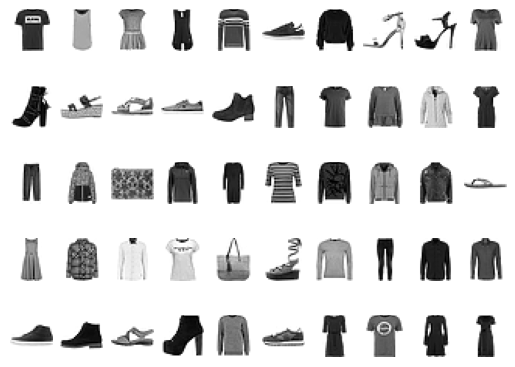

In [11]:
figure=plt.figure()
siz=50
for i in range(1,siz+1):
  plt.subplot(5,10,i)
  plt.axis("off")
  plt.imshow(trainset.data[i], cmap='gray_r')


In [12]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [13]:
#dataiter = iter(trainloader)
#images, labels = dataiter.next()

In [14]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [16]:
epochs = 15

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data


        inputs = inputs.to(device)
        labels = labels.to(device)


        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 50 == 49:
            correct = 0
            total = 0
            with torch.no_grad():

                for data in testloader:
                    images, labels = data
                    images = images.to(device)
                    labels = labels.to(device)

                    outputs = net(images)

                    _, predicted = torch.max(outputs.data, dim = 1)

                    total += labels.size(0)

                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.252, Test Accuracy = 44.980%
Epoch: 1, Mini-Batches Completed: 100, Loss: 1.985, Test Accuracy = 55.640%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.312, Test Accuracy = 68.280%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.910, Test Accuracy = 68.740%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.710, Test Accuracy = 72.890%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.696, Test Accuracy = 72.780%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.696, Test Accuracy = 74.340%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.677, Test Accuracy = 73.000%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.597, Test Accuracy = 75.290%
Epoch: 1, Mini-Batches Completed: 500, Loss: 0.623, Test Accuracy = 74.720%
Epoch: 1, Mini-Batches Completed: 550, Loss: 0.646, Test Accuracy = 77.620%
Epoch: 1, Mini-Batches Completed: 600, Loss: 0.601, Test Accuracy = 76.800%
Epoch: 1, Mini-Batches Completed: 650, Loss: 0.575, Test Accuracy = 

In [17]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.4}%')

Accuracy of the network on the 10000 test images: 91.1%


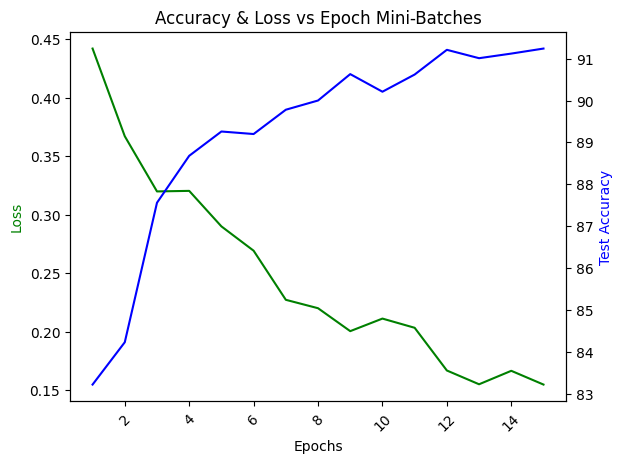

In [18]:
fig, ax1 = plt.subplots()
plt.title("Accuracy & Loss vs Epoch Mini-Batches")
plt.xticks(rotation=45)
ax2 = ax1.twinx()
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

In [19]:
PATH = './fashion_mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)